In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew 


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 


In [2]:
train = pd.read_csv("/Users/ijiseon/Desktop/ESAA-OB/house-prices-advanced-regression-techniques/train.csv")

test = pd.read_csv("/Users/ijiseon/Desktop/ESAA-OB/house-prices-advanced-regression-techniques/test.csv")

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print("The train data size before dropping Id feature is : {}".format(train.shape))

print("The test data size before dropping Id feature is : {}".format(test.shape))

The train data size before dropping Id feature is : (1460, 81)
The test data size before dropping Id feature is : (1459, 80)


In [7]:
train_ID = train["Id"]
test_ID = test["Id"]

train.drop("Id",axis=1, inplace=True)
test.drop("Id",axis=1, inplace=True)

In [8]:
print("The train data size after dropping Id feature is : {}".format(train.shape))

print("The test data size after dropping Id feature is : {}".format(test.shape))

The train data size after dropping Id feature is : (1460, 80)
The test data size after dropping Id feature is : (1459, 79)


> # Data Processing

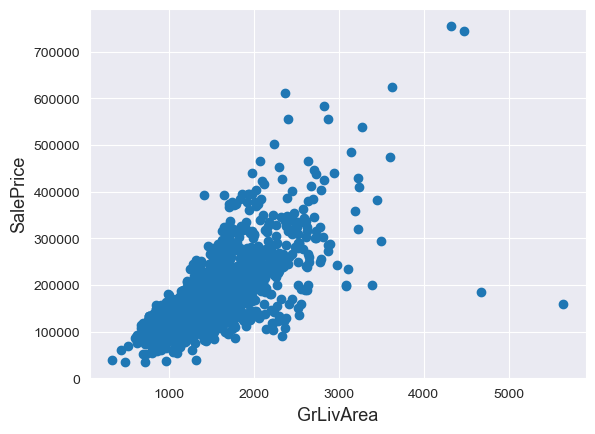

In [9]:
fig, ax = plt.subplots()

ax.scatter(x= train["GrLivArea"], y=train["SalePrice"])

plt.ylabel("SalePrice", fontsize=13)
plt.xlabel("GrLivArea", fontsize=13)

plt.show()

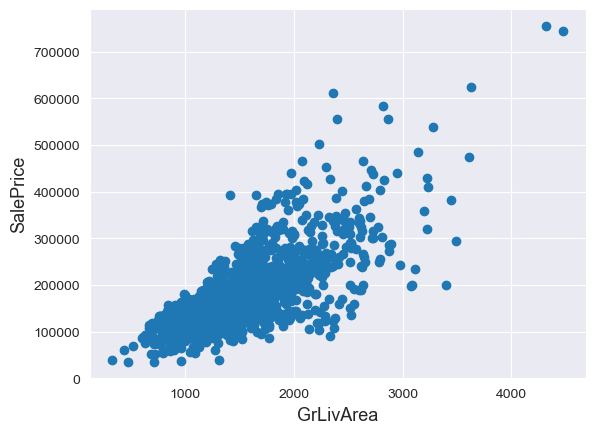

In [10]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu=180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

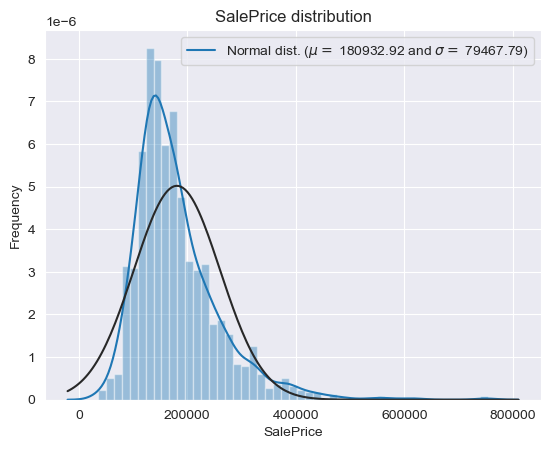

In [12]:
sns.distplot(train["SalePrice"], fit=norm) #정규분포를 추가해라

(mu, sigma) = norm.fit(train["SalePrice"])
print("\n mu={:.2f} and sigma = {:.2f}\n".format(mu,sigma))

plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu,sigma)], loc="best")

plt.ylabel("Frequency")
plt.title("SalePrice distribution")

> SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

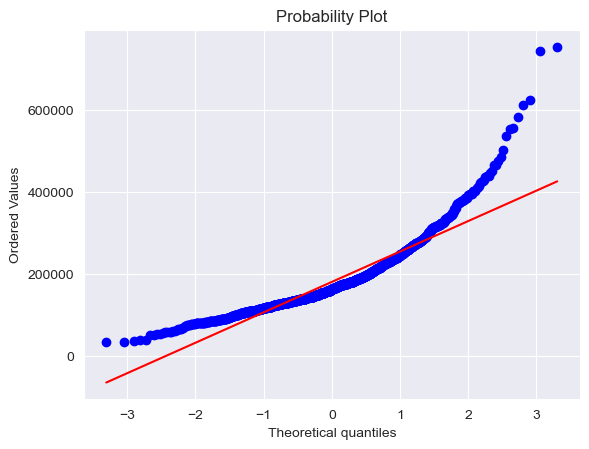

In [13]:
fig = plt.figure()
res = stats.probplot(train["SalePrice"],plot=plt)
plt.show()

- 그래프의 x축은 이론적인 정규 분포의 분위수(quantiles)를 나타냄<br>
: 이론적인 정규 분포의 분위수란, 정규 분포의 확률밀도 함수를 따라 생성된 데이터에서 각각의 값을 크기순으로 정렬했을 때, 각 값이 전체 데이터 중에서 어느 위치에 있는지를 나타내는 값입니다. 이를 간단히 설명하면, 정규 분포에서 어떤 특정 값이 분포의 어느 위치에 해당하는지를 나타내는 지표입니다.

- 그래프의 y축은 실제 데이터의 값들을 나타냄

- 이 그래프가 직선에 가까울수록 주어진 데이터가 정규 분포를 따른다는 것을 의미 -> 이 그래프를 통해 데이터가 정규 분포를 따르는지 여부를 시각적으로 확인<br>
: 만약 주어진 데이터가 정규 분포를 따른다면, 이론적인 정규 분포의 분위수와 주어진 데이터의 값을 비교했을 때, 분위수에 따라 데이터가 분포되는 경향이 유사할 것입니다. 즉, 데이터가 정규 분포를 따를수록, 이론적인 분위수에 따라 데이터의 분포가 균일하게 퍼져 직선 형태에 가까운 패턴을 보일 것입니다.

> Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

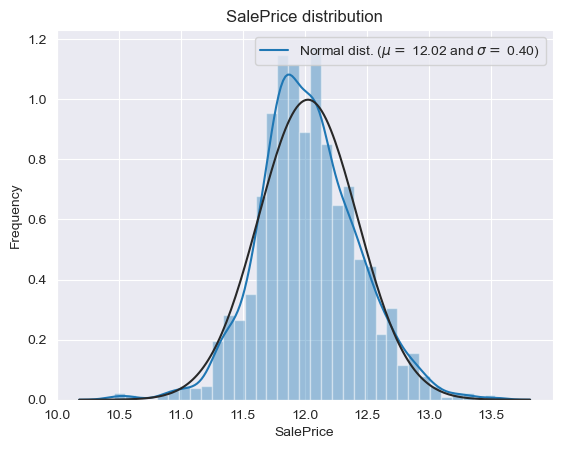

In [14]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train["SalePrice"], fit=norm)

(mu,sigma) = norm.fit(train["SalePrice"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu,sigma)], loc="best")

plt.ylabel("Frequency")
plt.title("SalePrice distribution")

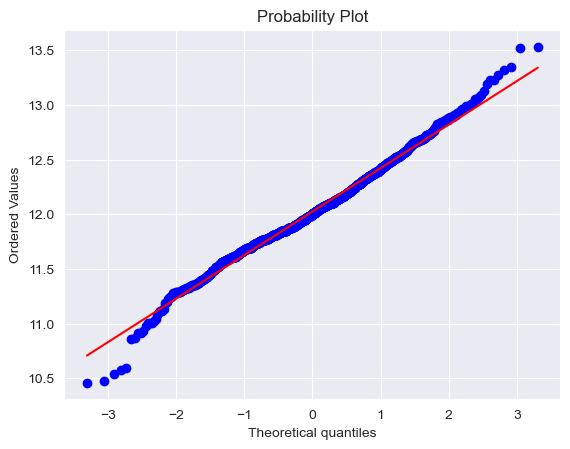

In [15]:
fig = plt.figure()
res = stats.probplot(train["SalePrice"],plot=plt)
plt.show()

> # Features engineering

In [16]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.SalePrice.values

all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(["SalePrice"],axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


- Missing Data

In [17]:
all_data_na = (all_data.isnull().sum() / len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({"Missing Ratio" : all_data_na})

missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

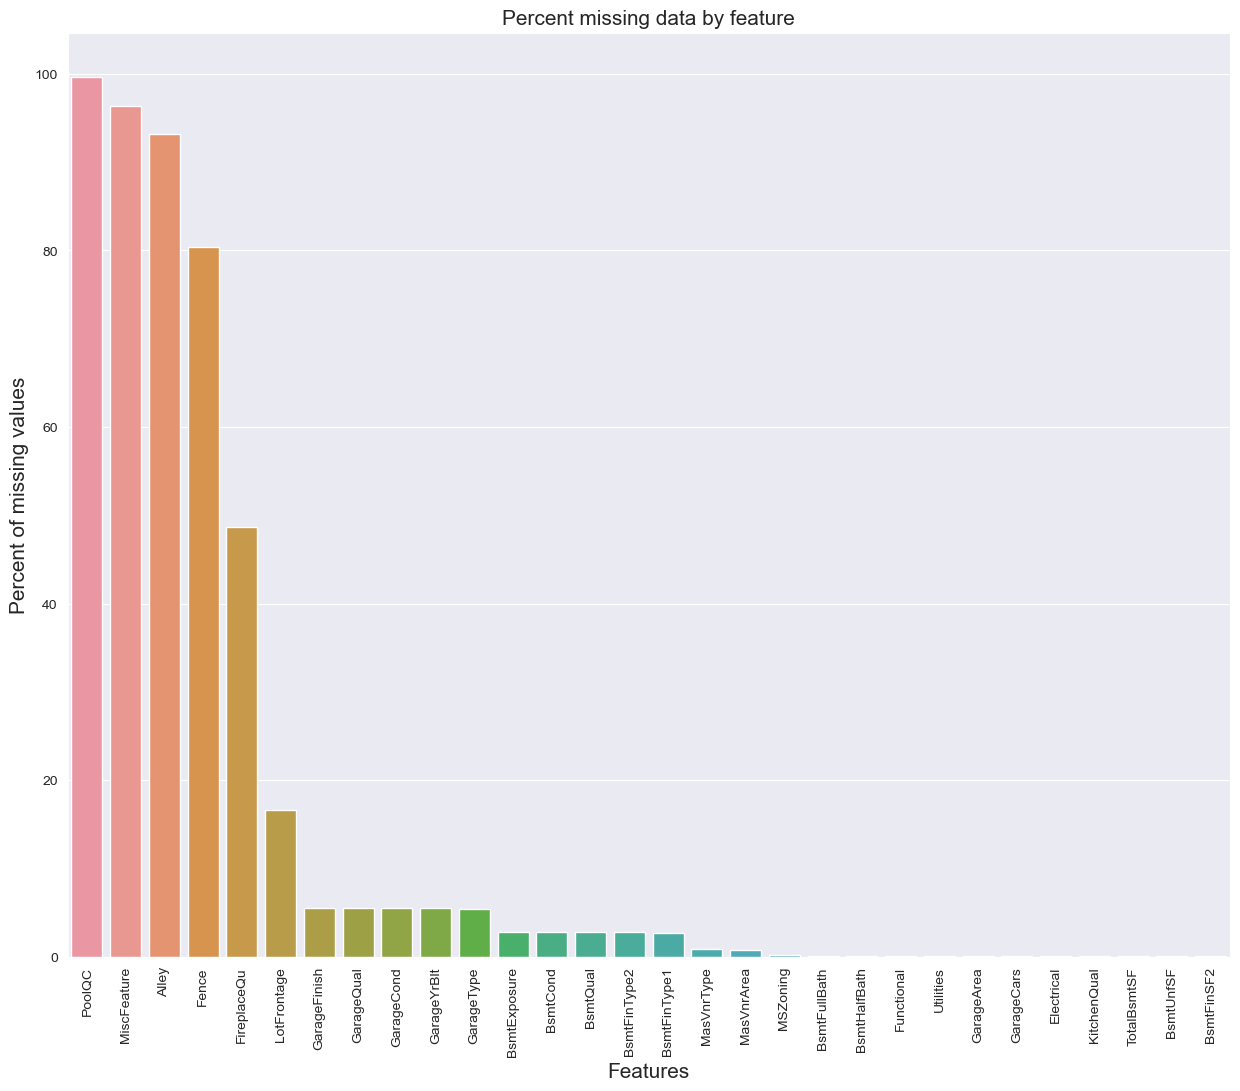

In [19]:
f,ax = plt.subplots(figsize=(15,12))

plt.xticks(rotation="90")
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent of missing values", fontsize=15)
plt.title("Percent missing data by feature", fontsize=15)

- Data Correalation

<AxesSubplot:>

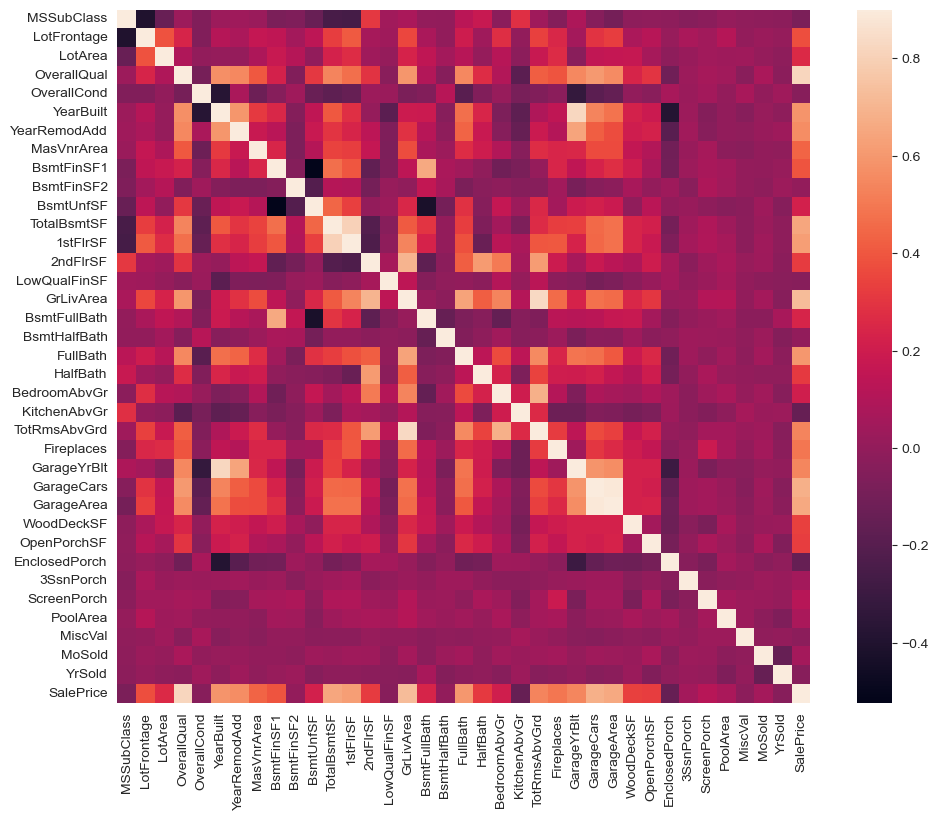

In [21]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

- Imputing missing values

In [22]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [23]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [24]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [25]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [26]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [27]:
for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    all_data[col] = all_data[col].fillna("None")

In [31]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

data feature를 고려했을 때, 집 혹은 그 근처에 이 시설물이 있는지 여부기 때문에 NA는 없음을 의미해서 이렇게 대체

In [30]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
                                                                                     lambda x : x.fillna(x.median()))

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [33]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [34]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [35]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [32]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

시설물의 개수를 물어보기 때문에 없으면 NA는 없다고 판단해, 0으로 대체 

In [38]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [48]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [50]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [51]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [52]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

na가 많지 않기 때문에 Frequent한 것으로 대체

In [46]:
all_data["Utilities"].value_counts(dropna=False)

AllPub    2914
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [47]:
all_data = all_data.drop(['Utilities'], axis=1)

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [49]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Functional : data description says NA means typical

In [53]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


- it remains no missing value

> ## More Feature engeneering

In [54]:
# Transforming some numerical variables that are really categorical

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [55]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [57]:
from sklearn.preprocessing import LabelEncoder

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
    
print("Shape all_data:{}".format(all_data.shape))

Shape all_data:(2917, 78)


In [58]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [59]:
# Skewed features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({"Skew": skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [60]:
# Box Cox Transformation of (highly) skewed features

skewness = skewness[abs(skewness)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15

for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [62]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [63]:
train = all_data[:ntrain]
test = all_data[ntrain:]

> # Modeling

In [64]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

- Define a cross validation strategy

In [69]:
# Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error",cv=kf))
    return(rmse)

- LASSO regression

: This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [65]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- Elastic Net Regression

In [66]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- Kernel Ridge Regression 

In [67]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- Gradient Boosting Regression

: With huber loss that makes it robust to outliers

In [73]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
                                  max_features="sqrt", min_samples_leaf=15, min_samples_split=10,
                                   loss="huber", random_state=5)

- XGBoost 

In [84]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, 
                             random_state =7, nthread = -1)

#silent 제거

- LightGBM

In [75]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

 Base models scores

In [76]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [77]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [78]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [79]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1167 (0.0083)



In [85]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1158 (0.0064)



In [88]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] 

> # Stacking models

### Simplest Stacking approach : Averaging base models

- Averaged base models class

In [92]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [93]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)



- Less simple Stacking : Adding a Meta-model

- Out-of-Fold Predictions

: 이 접근 방식에서는 base models를 학습할 때, 전체 학습 데이터를 여러 개의 fold로 나누고, 각 fold를 사용하여 base models를 학습하고 나머지 fold를 사용하여 예측을 수행합니다. 이를 통해 각 데이터 포인트에 대한 예측을 수집할 수 있습니다. 이러한 예측을 Out-of-Fold Predictions이라고 합니다. 이러한 예측을 새로운 feature로 사용하여 meta-model을 학습하는 것이 특징입니다.


- Iterative Training

: Out-of-Fold Predictions을 생성하기 위해 데이터를 여러 번 반복해서 처리합니다. 예를 들어, 5-fold stacking을 사용하는 경우 데이터를 5개의 fold로 나누고, 각 fold를 사용하여 base models를 학습하고 예측을 수행합니다. 이러한 과정을 5번 반복하여 모든 데이터에 대한 Out-of-Fold Predictions을 얻습니다.


- Meta-Model Training

: Out-of-Fold Predictions을 새로운 feature로 사용하여 meta-model을 학습합니다. 이렇게 함으로써 여러 개의 base models에서 얻은 예측을 결합하여 최종 예측을 수행할 수 있습니다. 이러한 접근 방식은 여러 모델을 결합하여 보다 강력한 모델을 생성하는 데에 효과적입니다.

- Stacking averaged Models Class

In [104]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


- Stacking Averaged models Score

In [105]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0073)


In [106]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [110]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07839506096666854


In [107]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07861031233368987


In [108]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.07169383068991829


In [111]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.0754330239983443


In [112]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [113]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble

In [114]:
sub

,Id,SalePrice
0,1461,120228.287
1,1462,159021.514
2,1463,185810.174
3,1464,195994.601
4,1465,191264.882
...,...,...
1454,2915,83788.830
1455,2916,82091.903
1456,2917,168796.852
1457,2918,116189.691
